## Simple Player Behavior Simulation

1000 players and each player plays 10 levels

Playing time for each level (5-15 min)

Level success status (success: 80%)

Purchase (30%, random level)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
num_players = 1000
num_levels = 10
data = []

In [29]:
for player_id in range(1,num_players + 1):
    for num_levels in range(1, num_levels + 1):
        play_time = np.random.randint(5,16)

        level_success = np.random.choice([True, False], p=[0.8, 0.2])

        purchase = np.random.choice([True, False], p=[0.7, 0.3])

        amount_spent = 0
        
        if purchase:
            amount_spent = np.random.randint(1,21)
        
        level_data = {
            'player_id' : player_id,
            'level' : num_levels,
            'play_time' : play_time,
            'level_success' : level_success,
            'is_purchase' : purchase,
            'amount_spent' : amount_spent
        }

        data.append(level_data)

In [30]:
df = pd.DataFrame(data)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      30000 non-null  int64  
 1   play_time      30000 non-null  int64  
 2   level_success  30000 non-null  bool   
 3   is_purchase    30000 non-null  bool   
 4   amount_spent   30000 non-null  int64  
 5   level          20000 non-null  float64
dtypes: bool(2), float64(1), int64(3)
memory usage: 996.2 KB


## At which levels do you fail the most?

In [32]:
failure_counts = df[df['level_success'] == False]['level'].value_counts().sort_index()

print(failure_counts)

level
1.0     405
2.0     380
3.0     401
4.0     409
5.0     422
6.0     404
7.0     398
8.0     424
9.0     438
10.0    404
Name: count, dtype: int64


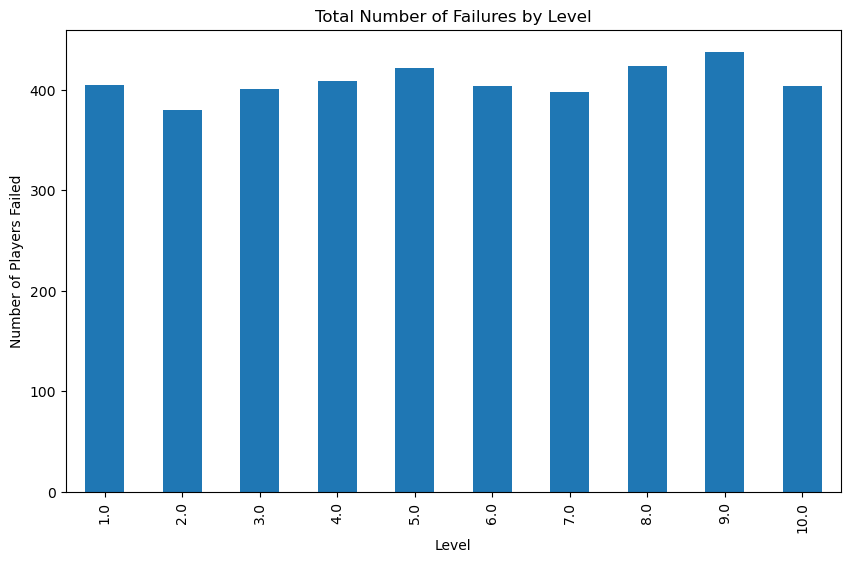

In [33]:
failure_counts.plot(kind='bar', figsize=(10,6))
plt.title('Total Number of Failures by Level')
plt.xlabel('Level')
plt.ylabel('Number of Players Failed')
plt.show()

## Does spending money affect the success rate of passing a level?

In [34]:
df['has_spent_money'] = df['amount_spent'] > 0

success_rate_by_spending = df.groupby('has_spent_money')['level_success'].mean()

print(success_rate_by_spending)

has_spent_money
False    0.795808
True     0.796095
Name: level_success, dtype: float64
